In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
# Load the data and split it into training and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Check the shape of the dataset
print(f"Training data shape: {x_train.shape}, Labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}, Labels shape: {y_test.shape}")

Training data shape: (60000, 28, 28), Labels shape: (60000,)
Test data shape: (10000, 28, 28), Labels shape: (10000,)


In [4]:
# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Reshape the data to add a channel dimension (for grayscale)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# Print the new shape of the data to verify
print(f"Training data shape after reshaping: {x_train.shape}")
print(f"Test data shape after reshaping: {x_test.shape}")

Training data shape after reshaping: (60000, 28, 28, 1)
Test data shape after reshaping: (10000, 28, 28, 1)


In [5]:
# Convert labels to categorical (optional)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
# Print the new shape of the data to verify
print(f"Training label  data shape after reshaping: {y_train.shape}")
print(f"Test label data shape after reshaping: {y_test.shape}")

Training label  data shape after reshaping: (60000, 10)
Test label data shape after reshaping: (10000, 10)


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Initialize the model
model = Sequential()

# Convolutional layer 1 + Pooling layer 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))

# Convolutional layer 2 + Pooling layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output for the dense layers
model.add(Flatten())

# Fully connected layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization

# Output layer (10 classes for digits 0-9)
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# Save the trained model
model.save('mnist_cnn_model.h5')
print("Model saved as mnist_cnn_model.h5")


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 32s 31ms/step - accuracy: 0.7942 - loss: 0.6344 - val_accuracy: 0.9798 - val_loss: 0.0639
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 33ms/step - accuracy: 0.9552 - loss: 0.1529 - val_accuracy: 0.9826 - val_loss: 0.0515
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 30s 32ms/step - accuracy: 0.9670 - loss: 0.1105 - val_accuracy: 0.9883 - val_loss: 0.0362
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 30s 32ms/step - accuracy: 0.9742 - loss: 0.0854 - val_accuracy: 0.9868 - val_loss: 0.0377
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 31ms/step - accuracy: 0.9777 - loss: 0.0738 - val_accuracy: 0.9892 - val_loss: 0.0331
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 29s 31ms/step - accuracy: 0.9816 - loss: 0.0635 - val_accuracy: 0.9907 - val_loss: 0.0272
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 29s 31ms/step - accuracy: 0.9819 - loss: 0.0576 - val_accuracy: 0.9913 - val_loss: 0.0292
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 30s 32ms/step - accuracy: 0.9854 - loss: 0.0488 - 

Model saved as mnist_cnn_model.h5


In [8]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 99.23%


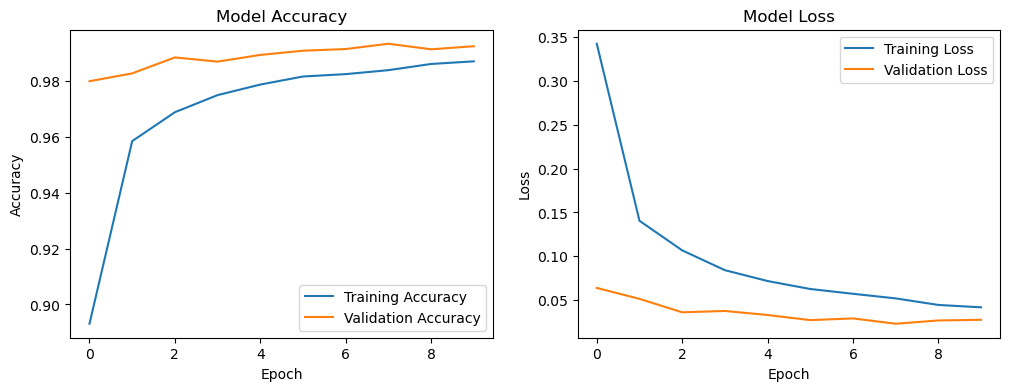

In [9]:
# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Show plots
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


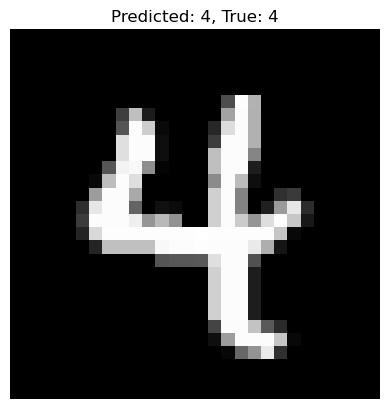

In [11]:
# Choose a test image at random
import numpy as np

index = np.random.randint(0, x_test.shape[0])
test_image = x_test[index]
true_label = np.argmax(y_test[index])

# Add a batch dimension and make a prediction
prediction = model.predict(test_image.reshape(1, 28, 28, 1))
predicted_label = np.argmax(prediction)

# Display the result
plt.imshow(test_image.reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {predicted_label}, True: {true_label}")
plt.axis('off')
plt.show()

In [13]:
import tkinter as tk
from tkinter import ttk, messagebox, colorchooser, filedialog
from PIL import Image, ImageGrab, ImageOps
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import os
import logging
from datetime import datetime
import json

class EnhancedDigitRecognizer:
    def __init__(self, model_path='mnist_cnn_model.h5'):
        self.setup_logging()
        self.load_model(model_path)
        self.prediction_history = []
        self.load_settings()
        self.setup_ui()
        self.drawing = False
        self.last_x = None
        self.last_y = None
        self.current_brush_color = "#000000"
        self.strokes = []  # Store drawing strokes for undo
        
    def setup_logging(self):
        """Configure logging"""
        log_dir = 'logs'
        if not os.path.exists(log_dir):
            os.makedirs(log_dir)
            
        logging.basicConfig(
            filename=f'logs/digit_recognizer_{datetime.now().strftime("%Y%m%d_%H%M%S")}.log',
            level=logging.INFO,
            format='%(asctime)s - %(levelname)s - %(message)s'
        )

    def load_model(self, model_path):
        """Load the trained model"""
        try:
            self.model = load_model(model_path)
            logging.info("Model loaded successfully")
        except Exception as e:
            logging.error(f"Failed to load model: {str(e)}")
            messagebox.showerror("Error", "Failed to load the model. Please check if the model file exists.")
            raise

    def load_settings(self):
        """Load user settings"""
        self.settings = {
            'brush_size': 15,
            'brush_color': '#000000',
            'canvas_color': '#FFFFFF'
        }
        
        try:
            if os.path.exists('settings.json'):
                with open('settings.json', 'r') as f:
                    self.settings.update(json.load(f))
        except Exception as e:
            logging.error(f"Failed to load settings: {str(e)}")

    def setup_ui(self):
        """Initialize the UI"""
        self.window = tk.Tk()
        self.window.title("Enhanced Digit Recognizer")
        self.window.geometry("800x600")
        
        # Configure styles
        style = ttk.Style()
        style.configure("TButton", padding=5)
        style.configure("TLabel", padding=3)
        
        # Main container with two panels
        main_container = ttk.PanedWindow(self.window, orient=tk.HORIZONTAL)
        main_container.pack(fill=tk.BOTH, expand=True, padx=5, pady=5)
        
        # Left panel for drawing
        left_panel = ttk.Frame(main_container)
        main_container.add(left_panel, weight=2)
        
        # Right panel for history
        right_panel = ttk.Frame(main_container)
        main_container.add(right_panel, weight=1)
        
        self.setup_drawing_area(left_panel)
        self.setup_controls(left_panel)
        self.setup_history_panel(right_panel)
        
    def setup_drawing_area(self, parent):
        """Setup the drawing canvas"""
        # Canvas frame
        canvas_frame = ttk.LabelFrame(parent, text="Drawing Area", padding=10)
        canvas_frame.pack(fill=tk.BOTH, expand=True, padx=5, pady=5)
        
        # Canvas
        self.canvas = tk.Canvas(
            canvas_frame,
            width=280,
            height=280,
            bg=self.settings['canvas_color'],
            relief="ridge",
            bd=3
        )
        self.canvas.pack(padx=5, pady=5)
        
        # Bind events
        self.canvas.bind("<Button-1>", self.start_drawing)
        self.canvas.bind("<B1-Motion>", self.draw)
        self.canvas.bind("<ButtonRelease-1>", self.stop_drawing)
        
    def setup_controls(self, parent):
        """Setup the control panel"""
        controls = ttk.LabelFrame(parent, text="Controls", padding=10)
        controls.pack(fill=tk.X, padx=5, pady=5)
        
        # Brush size control
        size_frame = ttk.Frame(controls)
        size_frame.pack(fill=tk.X, pady=5)
        
        ttk.Label(size_frame, text="Brush Size:").pack(side=tk.LEFT, padx=5)
        self.brush_size = tk.IntVar(value=self.settings['brush_size'])
        brush_scale = ttk.Scale(
            size_frame,
            from_=5,
            to=30,
            orient=tk.HORIZONTAL,
            variable=self.brush_size
        )
        brush_scale.pack(side=tk.LEFT, fill=tk.X, expand=True, padx=5)
        
        # Color picker
        color_btn = ttk.Button(
            size_frame,
            text="Brush Color",
            command=self.choose_color
        )
        color_btn.pack(side=tk.LEFT, padx=5)
        
        # Action buttons
        btn_frame = ttk.Frame(controls)
        btn_frame.pack(fill=tk.X, pady=5)
        
        ttk.Button(
            btn_frame,
            text="Clear",
            command=self.clear_canvas
        ).pack(side=tk.LEFT, padx=5)
        
        ttk.Button(
            btn_frame,
            text="Predict",
            command=self.predict_digit
        ).pack(side=tk.LEFT, padx=5)
        
        ttk.Button(
            btn_frame,
            text="Undo",
            command=self.undo_last_stroke
        ).pack(side=tk.LEFT, padx=5)
        
        ttk.Button(
            btn_frame,
            text="Save Drawing",
            command=self.save_drawing
        ).pack(side=tk.LEFT, padx=5)
        
        # Results display
        self.result_label = ttk.Label(
            controls,
            text="Draw a digit and click Predict",
            font=('Helvetica', 14)
        )
        self.result_label.pack(pady=5)
        
        self.confidence_label = ttk.Label(
            controls,
            text="",
            font=('Helvetica', 12)
        )
        self.confidence_label.pack()
        
    def setup_history_panel(self, parent):
        """Setup the prediction history panel"""
        history_frame = ttk.LabelFrame(parent, text="Prediction History", padding=10)
        history_frame.pack(fill=tk.BOTH, expand=True, padx=5, pady=5)
        
        # Create treeview
        columns = ('Time', 'Digit', 'Confidence')
        self.history_tree = ttk.Treeview(
            history_frame,
            columns=columns,
            show='headings',
            height=10
        )
        
        # Configure columns
        for col in columns:
            self.history_tree.heading(col, text=col)
            self.history_tree.column(col, width=80)
        
        # Add scrollbar
        scrollbar = ttk.Scrollbar(
            history_frame,
            orient=tk.VERTICAL,
            command=self.history_tree.yview
        )
        
        self.history_tree.configure(yscrollcommand=scrollbar.set)
        
        # Pack elements
        self.history_tree.pack(side=tk.LEFT, fill=tk.BOTH, expand=True)
        scrollbar.pack(side=tk.RIGHT, fill=tk.Y)
        
        # Export button
        ttk.Button(
            history_frame,
            text="Export History",
            command=self.export_history
        ).pack(pady=5)

    def choose_color(self):
        """Open color picker"""
        color = colorchooser.askcolor(title="Choose Brush Color")[1]
        if color:
            self.current_brush_color = color
            self.settings['brush_color'] = color

    def clear_canvas(self):
        """Clear the canvas"""
        self.canvas.delete("all")
        self.strokes = []
        self.result_label.config(text="Draw a digit and click Predict")
        self.confidence_label.config(text="")
        logging.info("Canvas cleared")

    def undo_last_stroke(self):
        """Undo the last drawing stroke"""
        if self.strokes:
            last_stroke = self.strokes.pop()
            self.canvas.delete(last_stroke)

    def start_drawing(self, event):
        """Handle drawing start"""
        self.drawing = True
        self.last_x = event.x
        self.last_y = event.y

    def draw(self, event):
        """Handle drawing motion"""
        if self.drawing:
            x, y = event.x, event.y
            size = self.brush_size.get()
            
            line = self.canvas.create_line(
                self.last_x, self.last_y, x, y,
                width=size,
                fill=self.current_brush_color,
                capstyle=tk.ROUND,
                smooth=True
            )
            
            self.strokes.append(line)
            self.last_x = x
            self.last_y = y

    def stop_drawing(self, event):
        """Handle drawing stop"""
        self.drawing = False

    def save_drawing(self):
        """Save the current drawing"""
        try:
            filename = filedialog.asksaveasfilename(
                defaultextension=".png",
                filetypes=[("PNG files", "*.png"), ("All files", "*.*")]
            )
            if filename:
                x = self.window.winfo_rootx() + self.canvas.winfo_x()
                y = self.window.winfo_rooty() + self.canvas.winfo_y()
                x1 = x + self.canvas.winfo_width()
                y1 = y + self.canvas.winfo_height()
                
                ImageGrab.grab().crop((x, y, x1, y1)).save(filename)
                messagebox.showinfo("Success", "Drawing saved successfully!")
        except Exception as e:
            logging.error(f"Failed to save drawing: {str(e)}")
            messagebox.showerror("Error", "Failed to save drawing")

    def export_history(self):
        """Export prediction history"""
        try:
            filename = filedialog.asksaveasfilename(
                defaultextension=".csv",
                filetypes=[("CSV files", "*.csv"), ("All files", "*.*")]
            )
            if filename:
                with open(filename, 'w') as f:
                    f.write("Time,Digit,Confidence\n")
                    for record in self.prediction_history:
                        f.write(f"{record['time']},{record['digit']},{record['confidence']}\n")
                messagebox.showinfo("Success", "History exported successfully!")
        except Exception as e:
            logging.error(f"Failed to export history: {str(e)}")
            messagebox.showerror("Error", "Failed to export history")

    def preprocess_image(self):
        """Preprocess the canvas image"""
        try:
            x = self.window.winfo_rootx() + self.canvas.winfo_x()
            y = self.window.winfo_rooty() + self.canvas.winfo_y()
            x1 = x + self.canvas.winfo_width()
            y1 = y + self.canvas.winfo_height()
            
            img = ImageGrab.grab().crop((x, y, x1, y1))
            img = img.convert('L')
            img = ImageOps.invert(img)
            img = img.resize((28, 28), Image.Resampling.LANCZOS)
            
            img_array = np.array(img).astype('float32') / 255
            img_array = img_array.reshape(1, 28, 28, 1)
            
            return img_array
        except Exception as e:
            logging.error(f"Image preprocessing failed: {str(e)}")
            messagebox.showerror("Error", "Failed to process the image")
            return None

    def predict_digit(self):
        """Predict the drawn digit"""
        try:
            img_array = self.preprocess_image()
            if img_array is None:
                return
                
            prediction = self.model.predict(img_array, verbose=0)
            digit = np.argmax(prediction)
            confidence = prediction[0][digit] * 100
            
            # Update display
            self.result_label.config(
                text=f"Predicted Digit: {digit}",
                foreground="green" if confidence > 80 else "orange"
            )
            self.confidence_label.config(
                text=f"Confidence: {confidence:.2f}%"
            )
            
            # Update history
            timestamp = datetime.now().strftime("%H:%M:%S")
            self.history_tree.insert(
                '',
                'end',
                values=(timestamp, digit, f"{confidence:.2f}%")
            )
            
            # Store prediction
            self.prediction_history.append({
                'time': timestamp,
                'digit': digit,
                'confidence': confidence
            })
            
            logging.info(f"Prediction made: digit={digit}, confidence={confidence:.2f}%")
            
        except Exception as e:
            logging.error(f"Prediction failed: {str(e)}")
            messagebox.showerror("Error", "Failed to make prediction")

    def run(self):
        """Start the application"""
        try:
            self.window.mainloop()
        except Exception as e:
            logging.error(f"Application crashed: {str(e)}")
            messagebox.showerror("Error", "Application crashed. Check logs for details.")

if __name__ == "__main__":
    try:
        app = EnhancedDigitRecognizer()
        app.run()
    except Exception as e:
        logging.error(f"Failed to start application: {str(e)}")
        messagebox.showerror("Error", "Failed to start application")